In [1]:
import json
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import collections
from collections import Counter

In [2]:
pl = np.load("predicted_labels.npy")
tl = np.load("true_labels.npy")
pl_mask = np.load("predicted_labels_mask_100.npy")
tl_mask = np.load("true_labels_mask_100.npy")
pl_and = np.load("predicted_labels_AND_100.npy")
tl_and = np.load("true_labels_AND_100.npy")

In [3]:
dataset= pd.read_pickle("whole_data.pkl")
ids = json.load(open("Data/post_id_divisions.json"))
X_test=dataset[dataset['Post_id'].isin(ids['test'])]
new_ids = list(X_test["Post_id"])
dataset_details=json.load(open("Data/dataset.json"))

In [26]:
def get_text_ids(true,pred):
    ids_arr  = np.where(true!=pred)
    text_ids_arr = np.asarray(new_ids)[ids_arr]
    return ids_arr,text_ids_arr

In [27]:
def get_counts_categories(ids_mc,text_ids_mc):
    df = pd.DataFrame(columns=["text","ann labels","target","true labels","pred labels"])
    all_targets = []
    for i,id in enumerate(text_ids_mc):
        t = []
        for item in dataset_details[id]["annotators"]:
            t.extend(item["target"])
        new_row = {"text":dataset_details[id]["post_tokens"],"ann labels":[item["label"] for item in dataset_details[id]["annotators"]],"target":set(t), "true labels":tl[ids_mc[0][i]],"pred labels":pl[ids_mc[0][i]]}
        df = df.append(new_row,ignore_index=True)
        all_targets.extend(list(new_row["target"]))
        counter_targets=collections.Counter(all_targets)
        del counter_targets["None"]
#         counter_targets = counter_targets.most_common(10)
    return counter_targets

In [28]:
# counter_targets=collections.Counter(all_targets)
# del counter_targets["None"]
# counter_targets = counter_targets.most_common(10)
a,b = get_text_ids(tl,pl)
ct = get_counts_categories(a,b)
am,bm = get_text_ids(tl_mask,pl_mask)
ct_mask = get_counts_categories(am,bm)
aa,ba = get_text_ids(tl_and,pl_and)
ct_and = get_counts_categories(aa,ba)

Text(0, 0.5, '# of Misclassifications')

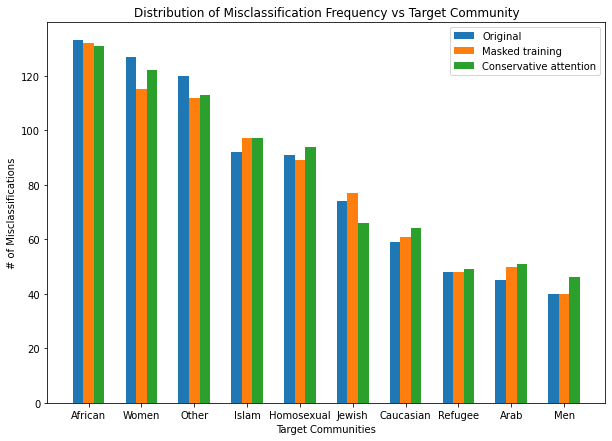

In [33]:
X = [c[0] for c in ct.most_common(10)]

Y1 = [ct[c] for c in X]
Y2 = [ct_mask[c] for c in X]
Y3 = [ct_and[c] for c in X]
# X = list(counter_targets.keys())
# Y = list(counter_targets.values())

X_axis = np.arange(len(X))
fig, ax = plt.subplots(figsize=(10,7))

  
ax.bar(X_axis - 0.2, Y1, 0.2, label = 'Original')
ax.bar(X_axis , Y2, 0.2, label = 'Masked training')
ax.bar(X_axis + 0.2, Y3, 0.2, label = 'Conservative attention')
plt.xticks(X_axis, X)
ax.grid(False)
# ax.bar(X, Y)
plt.legend()
plt.title('Distribution of Misclassification Frequency vs Target Community')
plt.xlabel('Target Communities')
plt.ylabel('# of Misclassifications')

Text(0, 0.5, '# of Misclassifications')

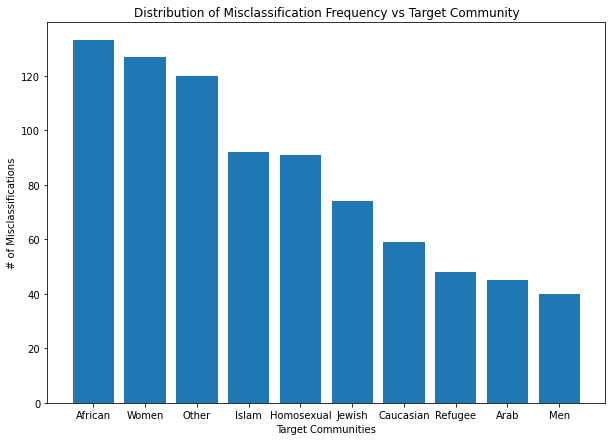

In [60]:
X = [c[0] for c in counter_targets]

Y = [c[1] for c in counter_targets]
# X = list(counter_targets.keys())
# Y = list(counter_targets.values())

fig, ax = plt.subplots(figsize=(10,7))
ax.grid(False)
ax.bar(X, Y)
plt.title('Distribution of Misclassification Frequency vs Target Community')
plt.xlabel('Target Communities')
plt.ylabel('# of Misclassifications')

In [34]:
labels_mc = tl[pl!=tl]
labels_mc_mask = tl_mask[pl_mask!=tl_mask]
labels_mc_and = tl_and[pl_and!=tl_and]

98 266 235 Counter({1: 266, 2: 235, 0: 98})
[0, 1, 2]
[98, 266, 235] [113, 248, 227] [108, 214, 259]


Text(0, 0.5, '# of Misclassifications')

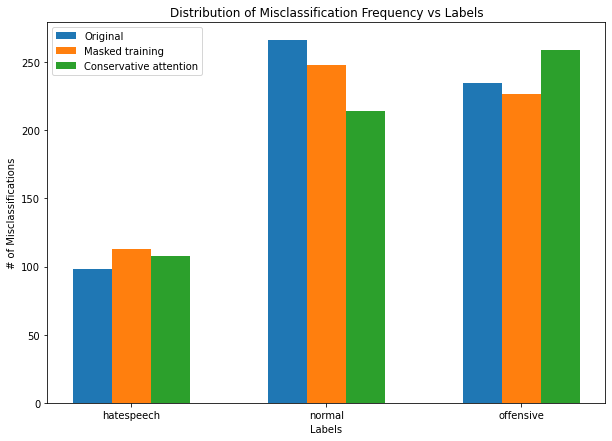

In [40]:
# X = [c[0] for c in ct.most_common(10)]
counter1=collections.Counter(labels_mc)
print(counter1[0],counter1[1],counter1[2],counter1)
counter2=collections.Counter(labels_mc_mask)
counter3=collections.Counter(labels_mc_and)
label_freq_dict = {'hatespeech': counter1[0], 'normal': counter1[1], 'offensive': counter1[2]}
# key = list(label_freq_dict.keys())
key = [0,1,2]
print(key)
Y1 = [counter1[c] for c in key]
Y2 = [counter2[c] for c in key]
Y3 = [counter3[c] for c in key]
print(Y1,Y2,Y3)
# X = list(counter_targets.keys())
# Y = list(counter_targets.values())

X_axis = np.arange(len(key))
fig, ax = plt.subplots(figsize=(10,7))

  
ax.bar(X_axis - 0.2, Y1, 0.2, label = 'Original')
ax.bar(X_axis , Y2, 0.2, label = 'Masked training')
ax.bar(X_axis + 0.2, Y3, 0.2, label = 'Conservative attention')
plt.xticks(X_axis, label_freq_dict.keys())
ax.grid(False)
# ax.bar(X, Y)
plt.legend()
plt.title('Distribution of Misclassification Frequency vs Labels')
plt.xlabel('Labels')
plt.ylabel('# of Misclassifications')

In [ ]:

# A = [1,1,2,3,2,1,2,2,3,1,2,2,3,3,2,1,1,2,2,3,3,3]
counter=collections.Counter(labels_mc)

label_freq_dict = {'hatespeech': counter[0], 'normal': counter[1], 'offensive': counter[2]}
if len(counter) == 3:
  colors = ['yellow', 'cyan', 'lime']
else:
  colors = ['red', 'blue']
X = list(label_freq_dict.keys())
Y = list(label_freq_dict.values())

fig, ax = plt.subplots()
ax.grid(False)
ax.bar(X, Y,color=colors)
plt.title('Distribution of Misclassification Frequency vs Labels')
plt.xlabel('Labels')
plt.ylabel('# of Misclassifications')

Text(0, 0.5, '# of Misclassifications')

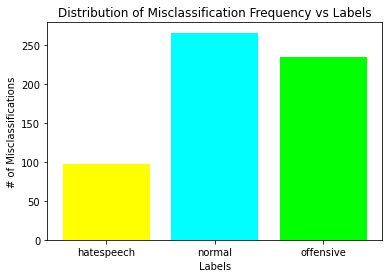

In [33]:

# A = [1,1,2,3,2,1,2,2,3,1,2,2,3,3,2,1,1,2,2,3,3,3]
counter=collections.Counter(labels_mc)

label_freq_dict = {'hatespeech': counter[0], 'normal': counter[1], 'offensive': counter[2]}
if len(counter) == 3:
  colors = ['yellow', 'cyan', 'lime']
else:
  colors = ['red', 'blue']
X = list(label_freq_dict.keys())
Y = list(label_freq_dict.values())

fig, ax = plt.subplots()
ax.grid(False)
ax.bar(X, Y,color=colors)
plt.title('Distribution of Misclassification Frequency vs Labels')
plt.xlabel('Labels')
plt.ylabel('# of Misclassifications')

C:\Users\Sayani Kundu\Documents\Sem 1\11711\ass3-final\HateXplain-master\confusion_matrix\confusion_matrix\confusion_matrix


Cloning into 'confusion_matrix'...


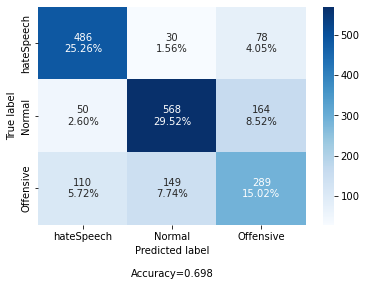

In [43]:
!git clone https://github.com/DTrimarchi10/confusion_matrix.git
%cd confusion_matrix/
from cf_matrix import *
import sklearn
import numpy as np
from sklearn.metrics import confusion_matrix
y_true = [1,2,3,2,1,2,3,2,1,1,2,2,3,3,2,2,2,1,1,2,3]
y_pred = [1,2,3,2,2,3,1,3,3,3,1,1,1,3,2,2,3,1,1,3,3]
cm = confusion_matrix(tl_and, pl_and)
categories = ['hateSpeech','Normal', "Offensive"]

make_confusion_matrix(cm, categories=categories)

Cloning into 'confusion_matrix'...


C:\Users\Sayani Kundu\Documents\Sem 1\11711\ass3-final\HateXplain-master\confusion_matrix\confusion_matrix


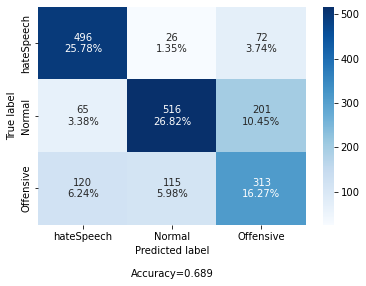

In [13]:
!git clone https://github.com/DTrimarchi10/confusion_matrix.git
%cd confusion_matrix/
from cf_matrix import *
import sklearn
import numpy as np
from sklearn.metrics import confusion_matrix
y_true = [1,2,3,2,1,2,3,2,1,1,2,2,3,3,2,2,2,1,1,2,3]
y_pred = [1,2,3,2,2,3,1,3,3,3,1,1,1,3,2,2,3,1,1,3,3]
cm = confusion_matrix(tl, pl)
categories = ['hateSpeech','Normal', "Offensive"]

make_confusion_matrix(cm, categories=categories)